In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN 

## Objectives 

Neural networks can be classified into static and dynamic categories. The multilayer network that we have discussed in the last three chapters is a static network. This means that the output can be calculated directly from the input through feedforward connections. In dynamic networks, the out- put depends not only on the current input to the network, but also on the current or previous inputs, outputs or states of the network. For example, the adaptive filter networks we discussed in Chapter 10 are dynamic net- works, since the output is computed from a tapped delay line of previous inputs. The Hopfield network we discussed in Chapter 3 is also a dynamic network. It has recurrent (feedback) connections, which means that the current output is a function of outputs at previous times. We will begin this chapter with a brief introduction to the operation of dy- namic networks, and then we will describe how these types of networks can be trained. The training will be based on optimization algorithms that use gradients (as in steepest descent and conjugate gradient algorithms) or Ja- cobians (as in Gauss-Newton and Levenberg-Marquardt algorithms) These algorithms were described in Chapters 10, 11 and 12 for static networks. The difference between the training of static and dynamic networks is in the manner in which the gradient or Jacobian is computed. In this chapter, we will present methods for computing gradients for dynamic networks.

## Introduction to Dynamic Networks

Neural networks can be classified into static and dynamic categories. The multilayer network discussed in the last three chapters is a static network. This means that the output can be calculated directly from the input through feedforward connections. 

Dynamic networks, on the other hand, depend not only on the current input to the network but also on the current or previous inputs, outputs, or states of the network. For example, the adaptive filter networks discussed in Chapter 10 are dynamic networks since the output is computed from a tapped delay line of previous inputs. 

The Hopfield network discussed in Chapter 3 is also a dynamic network. It has recurrent (feedback) connections, which means that the current output is a function of outputs at previous times. 

## Characteristics of Dynamic Networks

Dynamic networks have memory. Their response at any given time depends on the history of the input sequence. Because of this memory, they can learn sequential or time-varying patterns.

Instead of approximating functions like the static multilayer perceptron network of Chapter 11, a dynamic network can approximate a dynamic system. This has applications in various fields, including:
- Control of dynamic systems
- Prediction in financial markets
- Channel equalization in communication systems
- Phase detection in power systems
- Sorting and fault detection
- Speech recognition
- Learning grammars in natural languages
- Prediction of protein structure in genetics

## Training Dynamic Networks

Dynamic networks can be trained using standard optimization methods discussed in Chapters 9 through 12. However, the gradients and Jacobians required for these methods cannot be computed using the standard backpropagation algorithm. 

### Dynamic Backpropagation Algorithms

There are two general approaches to gradient and Jacobian calculations in dynamic networks:
1. **Backpropagation-Through-Time (BPTT)**
   - In BPTT, the network response is computed for all time points, and then the gradient is computed by starting at the last time point and working backward in time. 
   - This algorithm is efficient for gradient calculation but is challenging to implement online.

2. **Real-Time Recurrent Learning (RTRL)**
   - In RTRL, the gradient can be computed simultaneously with the network response by starting at the first time point and working forward through time.
   - Although RTRL requires more calculations than BPTT for gradient calculation, it provides a convenient framework for online implementation.

## Notation for Dynamic Networks

To present the general BPTT and RTRL algorithms more easily, we will introduce modified notation for networks that can have recurrent connections. 

### Summary

Dynamic networks differ from static networks in their ability to process sequences of inputs, making them suitable for applications requiring memory and learning of temporal patterns. 


## Layered Digital Dynamic Networks (LDDN)

In this section, we introduce the neural network framework that we will use to represent general dynamic networks. We call this framework **Layered Digital Dynamic Networks (LDDN)**. It extends the notation used to represent static multilayer networks, allowing us to conveniently represent networks with multiple recurrent (feedback) connections and tapped delay lines.

## Example Dynamic Network

To help us introduce the LDDN notation, consider the example dynamic network depicted in Figure.1.

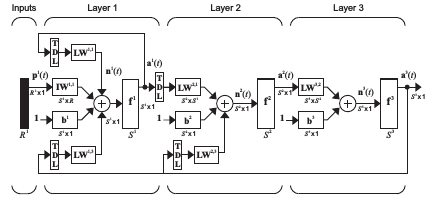

Figure.1 Example Dynamic Network

## General Equations

The general equations for the computation of the net input $ n_m(t) $ for layer $ m $ of an LDDN are given by:

$$
n_m(t) = \sum_{l \in L_m} \sum_{d \in DL_{m,l}} LW_{m,l}(d) a_l(t - d) + \sum_{l \in I_m} \sum_{d \in DI_{m,l}} IW_{m,l}(d) p(t - d) + b_l
$$

Where:
- $ p(t) $ is the $ l $-th input vector to the network at time $ t $
- $ IW_{m,l} $ is the input weight between input $ l $ and layer $ m $
- $ LW_{m,l} $ is the layer weight between layer $ l $ and layer $ m $
- $ b_l $ is the bias vector for layer $ m $
- $ DL_{m,l} $ is the set of all delays in the tapped delay line between layer $ l $ and layer $ m $
- $ DI_{m,l} $ is the set of all delays in the tapped delay line between input $ l $ and layer $ m $
- $ I_m $ is the set of indices of input vectors that connect to layer $ m $
- $ L_m $ is the set of indices of layers that directly connect forward to layer $ m $

The output of layer $ m $ is computed as:

$$
a_m(t) = f(n_m(t))
$$

## Comparison with Static Multilayer Networks

Compare this with the static multilayer network equation:

$$
n_m(t) = \sum_{l \in L} W_{m,l} a_l(t) + b_m
$$

LDDN networks can have several layers connecting to layer $ m $, and some connections can be recurrent through tapped delay lines. An LDDN can also have multiple input vectors, with connections to any layer in the network. 

## Simulation Order and Backpropagation Order

Within the LDDN framework, any layer can connect to any other layer, even to itself. However, to use the above equation, we need to compute the layer outputs in a specific order known as the **simulation order**. 

The order in which the layer outputs must be computed to obtain the correct network output is called the simulation order. This order need not be unique; there may be several valid simulation orders. For example, in Figure.1, the standard numerical order $ 1-2-3 $ is the simulation order, while the backpropagation order is $ 3-2-1 $.

## Fundamental Unit of LDDN

As with the multilayer network, the fundamental unit of the LDDN is the layer. Each layer in the LDDN consists of five components:

1. A set of weight matrices that come into that layer (which may connect from other layers or from external inputs).
2. Any tapped delay lines (represented by $ DL_{m,l} $ or $ DI_{m,l} $) that appear at the input of a set of weight matrices.
3. A bias vector.
4. A summing junction.
5. A transfer function.

The output of the LDDN is a function not only of the weights, biases, and current network inputs, but also of some layer outputs at previous points in time. Therefore, calculating the gradient of the network output with respect to the weights and biases is complex. 

## Direct and Indirect Effects

The weights and biases have two different effects on the network output:
- **Direct effect**: This can be calculated using the standard backpropagation algorithm.
- **Indirect effect**: Some of the inputs to the network are previous outputs, which are also functions of the weights and biases.

The main focus of the next two sections is to develop a general gradient calculation for arbitrary LDDNs.


In [4]:
class LayeredDigitalDynamicNetwork:
    def __init__(self, layer_sizes, delays):
        """
        Initialize the Layered Digital Dynamic Network (LDDN) with given layer sizes and delays.
        
        :param layer_sizes: List of integers representing the number of neurons in each layer.
        :param delays: Dictionary specifying tapped delays for connections.
                       E.g., delays[(layer_i, layer_j)] = [delay_1, delay_2]
        """
        self.layer_sizes = layer_sizes
        self.delays = delays
        self.weights = {}
        self.biases = {}
        self.outputs = [[] for _ in range(len(layer_sizes))]

        # Initialize weights and biases
        for m in range(len(layer_sizes)):
            self.weights[m] = {}
            self.biases[m] = [0] * layer_sizes[m]
            for l in range(len(layer_sizes)):
                if (l, m) in delays:  # If there are delays from layer l to layer m
                    self.weights[m][l] = [[0] * len(delays[(l, m)]) for _ in range(layer_sizes[m])]
                else:
                    self.weights[m][l] = [[0] * layer_sizes[l] for _ in range(layer_sizes[m])]
    
    def set_weights(self, layer_from, layer_to, weights):
        """Set the weights for the connections from layer_from to layer_to."""
        self.weights[layer_to][layer_from] = weights

    def set_biases(self, layer, biases):
        """Set the biases for the specified layer."""
        self.biases[layer] = biases

    def forward(self, inputs):
        """
        Perform the forward pass of the LDDN.
        
        :param inputs: List of input vectors for the first layer.
        :return: The output of the last layer.
        """
        # Set the outputs of the input layer
        self.outputs[0] = inputs  

        # Calculate outputs for each layer
        for m in range(1, len(self.layer_sizes)):
            net_input = [0] * self.layer_sizes[m]  # Initialize net input for layer m

            # Calculate net input for layer m
            for l in range(m):  # Consider all previous layers
                if (l, m) in self.delays:  # If there are delays from layer l to layer m
                    for d in range(len(self.delays[(l, m)])):
                        delay = self.delays[(l, m)][d]
                        if len(self.outputs[l]) > delay:  # Check if there is a previous output
                            for neuron in range(self.layer_sizes[m]):
                                # Accumulate the weighted inputs from tapped delays
                                net_input[neuron] += self.weights[m][l][neuron][d] * self.outputs[l][-delay-1]  # Tap delay

                # If there are no delays, use the current output
                if self.outputs[l]:  # Ensure there are outputs from layer l
                    for neuron in range(self.layer_sizes[m]):
                        # Access weights for the current layer and previous layer
                        net_input[neuron] += self.weights[m][l][neuron][0] * self.outputs[l][-1]  # Current output

            # Add biases to the net input
            for neuron in range(self.layer_sizes[m]):
                net_input[neuron] += self.biases[m][neuron]

            # Apply activation function (e.g., sigmoid)
            self.outputs[m] = [self.sigmoid(x) for x in net_input]

        return self.outputs[-1]  # Return the output of the last layer

    @staticmethod
    def sigmoid(x):
        """Sigmoid activation function."""
        return 1 / (1 + (2.71828 ** -x))  # Using a constant for e instead of NumPy


# Example Usage
layer_sizes = [3, 4, 2]  # 3 neurons in input layer, 4 in hidden layer, 2 in output layer
delays = {(0, 1): [1], (1, 2): [0]}  # Delay from input layer to hidden layer and from hidden to output layer
network = LayeredDigitalDynamicNetwork(layer_sizes, delays)

# Set random weights and biases for demonstration
network.set_weights(0, 1, [[0.5] * 1 for _ in range(4)])  # Example weights from layer 0 to layer 1 with a delay
network.set_weights(1, 2, [[0.5] * 4 for _ in range(2)])  # Example weights from layer 1 to layer 2
network.set_biases(1, [0.1] * 4)  # Example biases for layer 1
network.set_biases(2, [0.1] * 2)  # Example biases for layer 2

# Define input for the network
input_vector = [1.0, 0.5, 0.2]
output = network.forward(input_vector)
print("Output of the network:", output)


Output of the network: [0.6705422702562736, 0.6705422702562736]


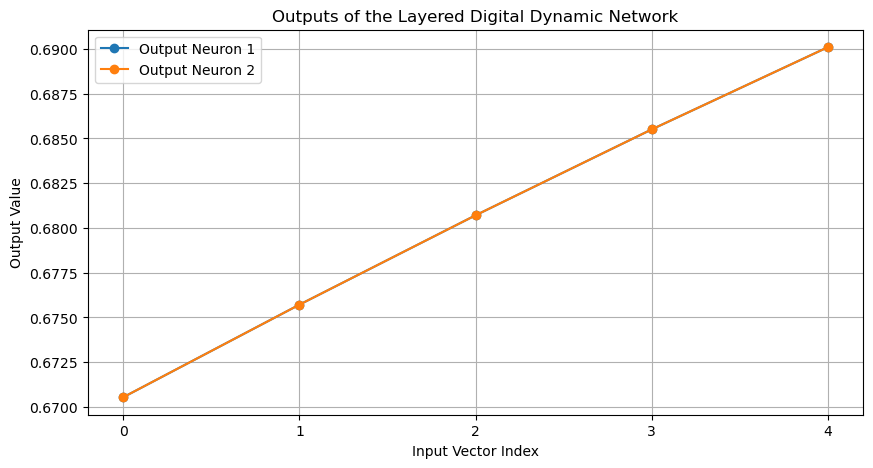

In [5]:
import matplotlib.pyplot as plt

class LayeredDigitalDynamicNetwork:
    def __init__(self, layer_sizes, delays):
        """
        Initialize the Layered Digital Dynamic Network (LDDN) with given layer sizes and delays.
        
        :param layer_sizes: List of integers representing the number of neurons in each layer.
        :param delays: Dictionary specifying tapped delays for connections.
                       E.g., delays[(layer_i, layer_j)] = [delay_1, delay_2]
        """
        self.layer_sizes = layer_sizes
        self.delays = delays
        self.weights = {}
        self.biases = {}
        self.outputs = [[] for _ in range(len(layer_sizes))]

        # Initialize weights and biases
        for m in range(len(layer_sizes)):
            self.weights[m] = {}
            self.biases[m] = [0] * layer_sizes[m]
            for l in range(len(layer_sizes)):
                if (l, m) in delays:  # If there are delays from layer l to layer m
                    self.weights[m][l] = [[0] * len(delays[(l, m)]) for _ in range(layer_sizes[m])]
                else:
                    self.weights[m][l] = [[0] * layer_sizes[l] for _ in range(layer_sizes[m])]
    
    def set_weights(self, layer_from, layer_to, weights):
        """Set the weights for the connections from layer_from to layer_to."""
        self.weights[layer_to][layer_from] = weights

    def set_biases(self, layer, biases):
        """Set the biases for the specified layer."""
        self.biases[layer] = biases

    def forward(self, inputs):
        """
        Perform the forward pass of the LDDN.
        
        :param inputs: List of input vectors for the first layer.
        :return: The output of the last layer.
        """
        # Set the outputs of the input layer
        self.outputs[0] = inputs  

        # Calculate outputs for each layer
        for m in range(1, len(self.layer_sizes)):
            net_input = [0] * self.layer_sizes[m]  # Initialize net input for layer m

            # Calculate net input for layer m
            for l in range(m):  # Consider all previous layers
                if (l, m) in self.delays:  # If there are delays from layer l to layer m
                    for d in range(len(self.delays[(l, m)])):
                        delay = self.delays[(l, m)][d]
                        if len(self.outputs[l]) > delay:  # Check if there is a previous output
                            for neuron in range(self.layer_sizes[m]):
                                # Accumulate the weighted inputs from tapped delays
                                net_input[neuron] += self.weights[m][l][neuron][d] * self.outputs[l][-delay-1]  # Tap delay

                # If there are no delays, use the current output
                if self.outputs[l]:  # Ensure there are outputs from layer l
                    for neuron in range(self.layer_sizes[m]):
                        # Access weights for the current layer and previous layer
                        net_input[neuron] += self.weights[m][l][neuron][0] * self.outputs[l][-1]  # Current output

            # Add biases to the net input
            for neuron in range(self.layer_sizes[m]):
                net_input[neuron] += self.biases[m][neuron]

            # Apply activation function (e.g., sigmoid)
            self.outputs[m] = [self.sigmoid(x) for x in net_input]

        return self.outputs[-1]  # Return the output of the last layer

    @staticmethod
    def sigmoid(x):
        """Sigmoid activation function."""
        return 1 / (1 + (2.71828 ** -x))  # Using a constant for e instead of NumPy


# Example Usage
layer_sizes = [3, 4, 2]  # 3 neurons in input layer, 4 in hidden layer, 2 in output layer
delays = {(0, 1): [1], (1, 2): [0]}  # Delay from input layer to hidden layer and from hidden to output layer
network = LayeredDigitalDynamicNetwork(layer_sizes, delays)

# Set random weights and biases for demonstration
network.set_weights(0, 1, [[0.5] * 1 for _ in range(4)])  # Example weights from layer 0 to layer 1 with a delay
network.set_weights(1, 2, [[0.5] * 4 for _ in range(2)])  # Example weights from layer 1 to layer 2
network.set_biases(1, [0.1] * 4)  # Example biases for layer 1
network.set_biases(2, [0.1] * 2)  # Example biases for layer 2

# Define a range of input vectors to test the network
input_vectors = [
    [1.0, 0.5, 0.2],
    [0.9, 0.6, 0.3],
    [0.8, 0.7, 0.4],
    [0.7, 0.8, 0.5],
    [0.6, 0.9, 0.6]
]

# Store outputs for plotting
outputs = []

# Compute outputs for each input vector
for input_vector in input_vectors:
    output = network.forward(input_vector)
    outputs.append(output)

# Convert outputs to a format suitable for plotting
outputs = list(zip(*outputs))  # Transpose to get outputs for each output neuron

# Plotting the results
plt.figure(figsize=(10, 5))
for i in range(len(outputs)):
    plt.plot(range(len(input_vectors)), outputs[i], marker='o', label=f'Output Neuron {i + 1}')

plt.title('Outputs of the Layered Digital Dynamic Network')
plt.xlabel('Input Vector Index')
plt.ylabel('Output Value')
plt.xticks(range(len(input_vectors)))
plt.legend()
plt.grid()
plt.show()



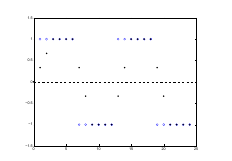
Figure.3 Response of ADALINE Filter Network


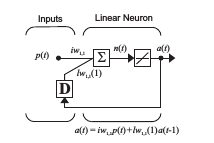

Figure.4 Recurrent Linear Neuron


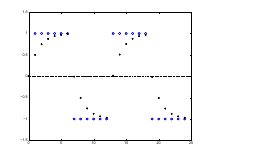

Figure.5 Recurrent Neuron Response

## Example Dynamic Networks

Before we introduce dynamic training, let’s get a feeling for the types of responses we can expect to see from dynamic networks.

Consider first the feedforward dynamic network shown in Figure.2.

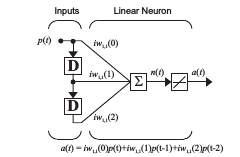

Figure.2 Example Feedforward Dynamic Network

## Feedforward Dynamic Network

This is an ADALINE filter, which we discussed in Chapter 10. Here we are representing it in the LDDN framework. The network has a TDL on the input, with 

$$
D_{1,1} = \{0, 1, 2\}.
$$

To demonstrate the operation of this network, we will apply a square wave as input, and we will set all of the weight values equal to:

$$
iw_{1,1}(0) = iw_{1,1}(1) = iw_{1,1}(2) = \frac{1}{3}.
$$

The network response is calculated from:

$$
a(t) = n(t) = \sum_{d=0}^{2} IW(d)p(t - d).
$$

Specifically, for this network, we have:

$$
n_1(t) = iw_{1,1}(0)p(t) + iw_{1,1}(1)p(t - 1) + iw_{1,1}(2)p(t - 2),
$$

where we have left off the superscripts on the weight and the input, since there is only one input and only one layer.

The response of the network is shown in Figure 14.3. The open circles represent the square-wave input signal $ p(t) $. The dots represent the network response $ a(t) $. For this dynamic network, the response at any time point depends on the previous three input values. If the input is constant, the output will become constant after three time steps. This type of linear network is called a Finite Impulse Response (FIR) filter.

$$
\begin{align*}
1.5 & \quad 1 \quad 0.5 \quad 0 \\
-0.5 & \quad -1 \quad -1.5 \quad 0 \quad 5 \quad 10 \quad 15 \quad 20 \quad 25
\end{align*}
$$

This dynamic network has memory. Its response at any given time will depend not only on the current input but on the history of the input sequence. If the network does not have any feedback connections, then only a finite amount of history will affect the response.

## Recurrent Dynamic Network

Now consider another simple linear dynamic network, but one that has a recurrent connection. The network in Figure.4 is a recurrent dynamic network. The equation of operation of the network is:

$$
a(t) = n(t) = LW(1)a(t - 1) + IW(0)p(t).
$$

Simplifying this, we have:

$$
a(t) = lw_{1,1}(1)a(t - 1) + iw_{1,1} p(t).
$$

To demonstrate the operation of this network, we will set the weight values to:

$$
lw_{1,1}(1) = \frac{1}{2} \quad \text{and} \quad iw_{1,1} = \frac{1}{2}.
$$

The response of this network to the square wave input is shown in Figure 14.5. The network responds exponentially to a change in the input sequence. Unlike the FIR filter network, the exact response of the network at any given time is a function of the infinite history of inputs to the network.

$$
\begin{align*}
1.5 & \quad 1 \quad 0.5 \quad 0 \\
-0.5 & \quad -1 \quad -1.5 \quad 0 \quad 5 \quad 10 \quad 15 \quad 20 \quad 25
\end{align*}
$$

To experiment with this infinite impulse response example, use the Neural Network Design Demonstration Infinite Impulse Response Network (nnd14iir).

### Comparison of Dynamic and Static Networks

Compare the dynamic networks of the previous two examples with the static, two-layer perceptron. Static networks can be trained to approximate static functions, like 

$$
\sin(p),
$$ 

where the output can be computed directly from the current input.

Dynamic networks, on the other hand, can be trained to approximate dynamic systems, such as robot arms, aircraft, biological processes, and economic systems, where the current system output depends on a history of previous inputs and outputs.

Because dynamic systems are more complex than static functions, we expect that the training process for dynamic networks will be more challenging than static network training.

In the following section, we will discuss the computation of gradients for the training of dynamic networks. For static networks, these gradients were computed using the standard backpropagation algorithm. For dynamic networks, the backpropagation algorithm must be modified.


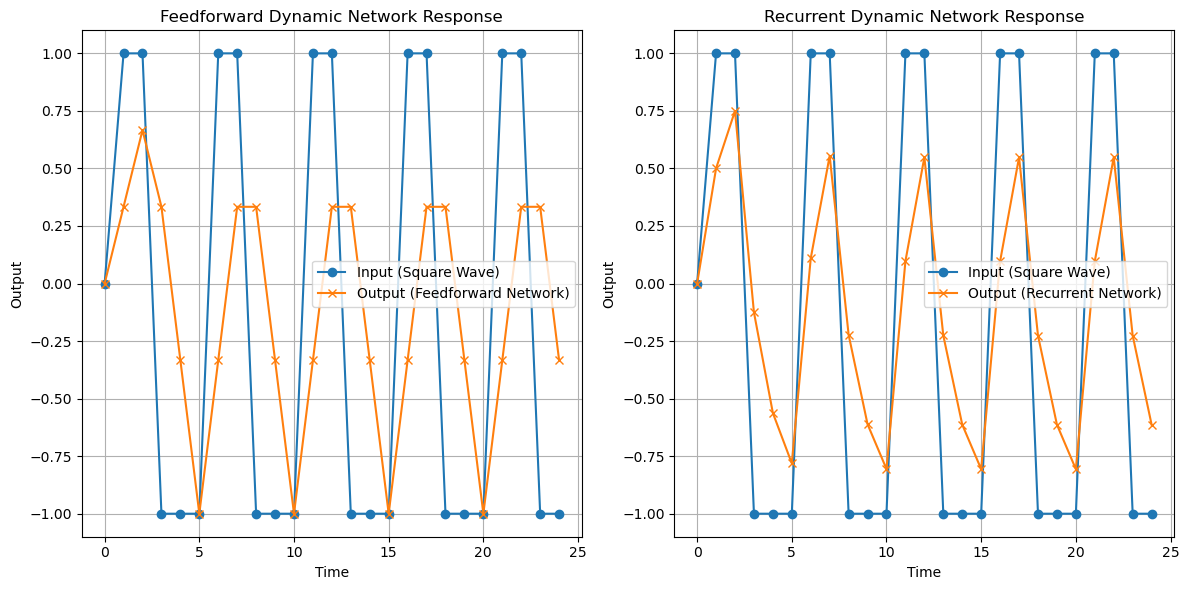

In [6]:
import matplotlib.pyplot as plt
import numpy as np

class FeedforwardDynamicNetwork:
    def __init__(self, weights):
        self.weights = weights  # Weights as a list for iw1,1(0), iw1,1(1), iw1,1(2)
        self.outputs = []

    def forward(self, input_signal):
        n = len(input_signal)
        output = []
        
        # Apply weights to the current input and past inputs
        for t in range(n):
            net_input = sum(self.weights[d] * input_signal[t - d] for d in range(len(self.weights)) if t - d >= 0)
            output.append(net_input)
        
        self.outputs = output
        return output


class RecurrentDynamicNetwork:
    def __init__(self, iw, lw):
        self.iw = iw  # Input weight
        self.lw = lw  # Layer weight
        self.previous_output = 0

    def forward(self, input_signal):
        output = []
        
        for p in input_signal:
            net_input = self.lw * self.previous_output + self.iw * p
            output.append(net_input)
            self.previous_output = net_input  # Update previous output for recurrence
            
        return output


# Simulation parameters
t = np.arange(0, 25, 1)  # Time steps
square_wave = np.sign(np.sin(2 * np.pi * t / 5))  # Create a square wave input

# Create feedforward dynamic network (ADALINE)
ff_weights = [1/3, 1/3, 1/3]  # Weights iw1,1(0), iw1,1(1), iw1,1(2)
feedforward_network = FeedforwardDynamicNetwork(ff_weights)
ff_output = feedforward_network.forward(square_wave)

# Create recurrent dynamic network
recurr_weight = 0.5
recurr_input_weight = 0.5
recurrent_network = RecurrentDynamicNetwork(recurr_input_weight, recurr_weight)
rec_output = recurrent_network.forward(square_wave)

# Plotting results
plt.figure(figsize=(12, 6))

# Plot feedforward dynamic network output
plt.subplot(1, 2, 1)
plt.plot(t, square_wave, 'o-', label='Input (Square Wave)')
plt.plot(t, ff_output, 'x-', label='Output (Feedforward Network)')
plt.title('Feedforward Dynamic Network Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid()

# Plot recurrent dynamic network output
plt.subplot(1, 2, 2)
plt.plot(t, square_wave, 'o-', label='Input (Square Wave)')
plt.plot(t, rec_output, 'x-', label='Output (Recurrent Network)')
plt.title('Recurrent Dynamic Network Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


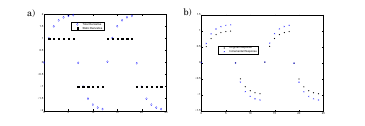

Figure 14.6 Derivatives for $ iw_{1,1} $​ and Response of Network in Figure.4

## Principles of Dynamic Learning

Before we get into the details of training dynamic networks, let's first investigate a simple example. Consider again the recurrent network shown in Figure 14.4. Suppose that we want to train the network using steepest descent. The first step is to compute the gradient of the performance function. For this example, we will use the sum squared error:

$$
F(x) = \sum_{t=1}^{Q} e(t)^2 = \sum_{t=1}^{Q} (t(t) - a(t))^2. \tag{14.7}
$$

The two elements of the gradient will be:

$$
\frac{\partial F(x)}{\partial lw_{1,1}(1)} = -2 \sum_{t=1}^{Q} e(t) \frac{\partial e(t)}{\partial lw_{1,1}(1)} \tag{14.8}
$$

and

$$
\frac{\partial F(x)}{\partial iw_{1,1}} = -2 \sum_{t=1}^{Q} e(t) \frac{\partial e(t)}{\partial iw_{1,1}} \tag{14.9}
$$

The key terms in these equations are the derivatives of the network output with respect to the weights:

$$
\frac{\partial a(t)}{\partial lw_{1,1}(1)} \quad \text{and} \quad \frac{\partial a(t)}{\partial iw_{1,1}}. \tag{14.10}
$$

If we had a static network, then these terms would be very easy to compute. They would correspond to $ a(t - 1) $ and $ p(t) $, respectively. However, for recurrent networks, the weights have two effects on the network output. The first is the direct effect, which is also seen in the corresponding static network. The second is an indirect effect, caused by the fact that one of the network inputs is a previous network output.

Let's compute the derivatives of the network output to demonstrate these two effects. The equation of operation of the network is given by:

$$
a(t) = lw_{1,1}(1) a(t - 1) + iw_{1,1} p(t). \tag{14.11}
$$

We can compute the terms in Eq. (14.10) by taking the derivatives of Eq. (14.11):

$$
\frac{\partial a(t)}{\partial lw_{1,1}(1)} = a(t - 1) + lw_{1,1}(1) \frac{\partial a(t - 1)}{\partial lw_{1,1}(1)}. \tag{14.12}
$$

$$
\frac{\partial a(t)}{\partial iw_{1,1}} = p(t) + lw_{1,1}(1) \frac{\partial a(t - 1)}{\partial iw_{1,1}}. \tag{14.13}
$$

The first term in each of these equations represents the direct effect that each weight has on the network output. The second term represents the indirect effect. Note that unlike the gradient computation for static networks, the derivative at each time point depends on the derivative at previous time points (or at future time points, as we will see later).

The following figures illustrate the dynamic derivatives. In Figure.6 a), we see the total derivatives $ \frac{\partial a(t)}{\partial iw_{1,1}} $ and also the static portions of the derivatives. Note that if we consider only the static portion, we will underestimate the effect of a change in the weight. 

In Figure.6 b), we see the original response of the network (which was also shown in Figure.5) and a new response, in which $ iw_{1,1} $ is increased from 0.5 to 0.6. By comparing the two parts of Figure.6, we can see how the derivative indicates the effect on the network response of a change in the weight $ iw_{1,1} $.

**Figure.6**: Derivatives for $ iw_{1,1} $ and Response of Network in Figure.4.

- (a) Total Derivative
- (b) Incremental Response

$$
\begin{align*}
\text{a)} & \quad 2 \\
\text{b)} & \quad 1.5 \\
\text{Original Response} & \quad 0.5 \\
0 & \quad -0.5 \\
-1 & \quad -1.5 \\
\end{align*}
$$

In Figure.7, we see similar results for the weight $ lw_{1,1}(1) $. The key ideas to get from this example are:
1. The derivatives have static and dynamic components.
2. The dynamic component depends on other time points.


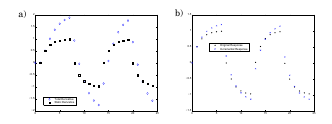

Figure.7 Derivatives for$ lw_{1,1}(1) $ and Response of Network in Figure.4

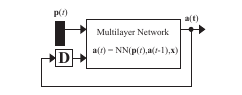

Figure.8 Simple Dynamic Network

# Dynamic Derivatives in Neural Networks

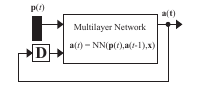


To experiment with dynamic derivatives, we use the Neural Network Dynamic Derivatives.

**Figure 14.6**: Derivatives for $ iw_{1,1} $ and Response of Network in Figure.4.

$$
\begin{align*}
\text{a)} & \quad 2 \\
\text{b)} & \quad 1.5 \\
\text{Total Derivative} & \quad 1.5 \\
\text{Static Derivative} & \quad 1 \\
\text{Original Response} & \quad 0.5 \\
\text{Incremental Response} & \quad 0.5 \\
0 & \quad 0 \\
-0.5 & \quad -0.5 \\
-1 & \quad -1 \\
-1.5 & \quad -1.5 \\
-2 & \quad -2 \\
\end{align*}
$$

---

## Introduction to Dynamic Networks

Having made this initial investigation of a single-neuron network, let’s consider a slightly more complex dynamic network shown in **Figure.8**. This network consists of a static multilayer network with a single feedback loop added from the output of the network to the input of the network through a single delay.

In this figure, the vector $ \mathbf{x} $ represents all of the network parameters (weights and biases), and the vector $ a(t) $ represents the output of the multilayer network at time step $ t $. This network will help us demonstrate the key steps of dynamic training.

$$
\text{Output: } a(t) = \text{NN}(p(t), a(t-1), \mathbf{x}) \tag{14.8}
$$

### Performance Index

As with a standard multilayer network, we want to adjust the weights and biases of the network to minimize the performance index $ F(\mathbf{x}) $, which is normally chosen to be the mean squared error. In Chapter 11, we derived the backpropagation algorithm for computing the gradient of $ F(\mathbf{x}) $, which we could then use with any of the optimization methods from Chapter 12 to minimize $ F(\mathbf{x}) $.

### Modifying Backpropagation for Dynamic Networks

With dynamic networks, we need to modify the standard backpropagation algorithm. There are two different approaches to this problem. They both use the chain rule but are implemented in different ways:

1. **Explicit Derivative:**
   $$
   \frac{\partial F}{\partial \mathbf{x}} = \sum_{t=1}^{Q} e \frac{\partial a(t)}{\partial \mathbf{x}} \frac{\partial F}{\partial a(t)} \tag{14.14}
   $$

2. **Complete Derivative:**
   $$
   \frac{\partial F}{\partial \mathbf{x}} = \sum_{t=1}^{Q} e \frac{\partial a(t)}{\partial \mathbf{x}} \frac{\partial F}{\partial a(t)} \tag{14.15}
   $$

where the superscript $ e $ indicates an explicit derivative, not accounting for indirect effects through time. The explicit derivatives can be obtained with the standard backpropagation algorithm.

### Additional Equations

To find the complete derivatives required in Eqs. (14.14) and (14.15), we need the following additional equations:

$$
\frac{\partial a(t)}{\partial \mathbf{x}} = \frac{\partial a(t)}{\partial a(t)} \frac{\partial a(t)}{\partial a(t-1)} \frac{\partial a(t-1)}{\partial \mathbf{x}} + \frac{\partial a(t)}{\partial \mathbf{x}} \tag{14.16}
$$

$$
\frac{\partial F}{\partial a(t)} = \frac{\partial F}{\partial a(t)} + \frac{\partial a(t+1)}{\partial F} \frac{\partial F}{\partial a(t)} \tag{14.17}
$$

### Real-Time Recurrent Learning (RTRL) Algorithm

Equations (14.14) and (14.16) make up the real-time recurrent learning (RTRL) algorithm. The key term is:

$$
\frac{\partial a(t)}{\partial \mathbf{x}} \tag{14.18}
$$

which must be propagated forward through time.

### Backpropagation Through Time (BPTT) Algorithm

Equations (14.15) and (14.17) make up the backpropagation-through-time (BPTT) algorithm. Here, the key term is:

$$
\frac{\partial F}{\partial a(t)} \tag{14.19}
$$

which must be propagated backward through time.

### Conclusion

In general, the RTRL algorithm requires somewhat more computation than the BPTT algorithm to compute the gradient. However, the BPTT algorithm cannot be conveniently implemented in real time since the outputs must be computed for all time steps, and then the derivatives must be backpropagated back to the initial time point. 

The RTRL algorithm is well suited for real-time implementation, since the derivatives can be calculated at each time step. For Jacobian calculations, which are needed for Levenberg-Marquardt algorithms, the RTRL algorithm is often more efficient than the BPTT algorithm.


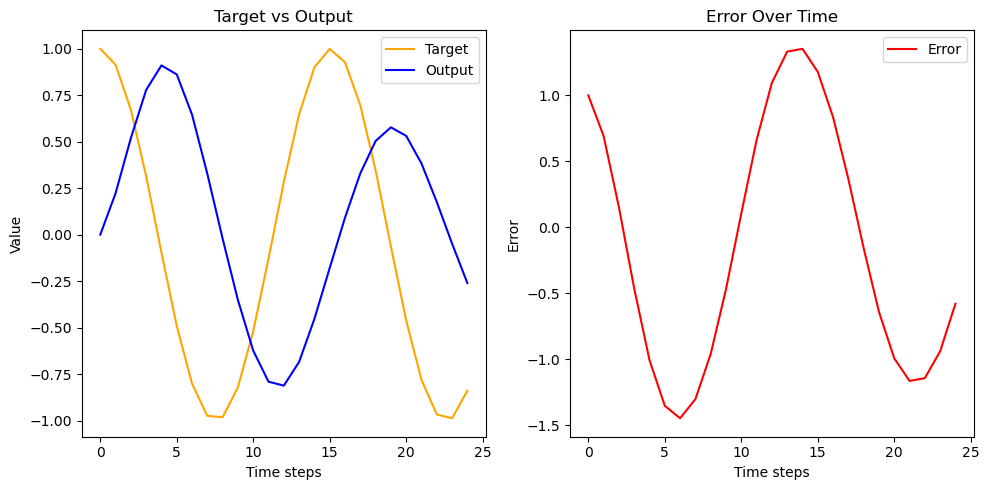

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
timesteps = 25  # Number of time steps
learning_rate = 0.01  # Learning rate
input_size = 1  # Input size
hidden_size = 1  # Number of hidden neurons
output_size = 1  # Output size

# Initialize weights and biases
iw_11 = 0.5  # Input weight
lw_11 = 0.5  # Feedback weight
bias = 0.0  # Bias
weights = np.array([iw_11, lw_11, bias])

# Initialize inputs and target outputs
p = np.sin(np.linspace(0, 10, timesteps))  # Input signal
target = np.cos(np.linspace(0, 10, timesteps))  # Target output

# Storage for outputs, gradients, and errors
a = np.zeros(timesteps)
errors = np.zeros(timesteps)
gradients = np.zeros((timesteps, 3))

# Training loop for dynamic derivatives
for t in range(timesteps):
    # Calculate current output based on previous output
    if t == 0:
        a[t] = weights[0] * p[t] + weights[2]  # No feedback for the first time step
    else:
        a[t] = weights[0] * p[t] + weights[1] * a[t - 1] + weights[2]

    # Calculate error
    errors[t] = target[t] - a[t]

    # Calculate gradients using RTRL
    if t == 0:
        gradients[t] = [-2 * errors[t] * p[t], -2 * errors[t] * a[t], -2 * errors[t]]
    else:
        gradients[t] = [
            -2 * errors[t] * p[t],
            -2 * errors[t] * (a[t - 1]),
            -2 * errors[t]
        ]

    # Update weights
    weights[0] -= learning_rate * gradients[t][0]
    weights[1] -= learning_rate * gradients[t][1]
    weights[2] -= learning_rate * gradients[t][2]

# Visualization of results
plt.figure(figsize=(10, 5))

# Plot target vs output
plt.subplot(1, 2, 1)
plt.plot(target, label='Target', color='orange')
plt.plot(a, label='Output', color='blue')
plt.title('Target vs Output')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.legend()

# Plot error over time
plt.subplot(1, 2, 2)
plt.plot(errors, label='Error', color='red')
plt.title('Error Over Time')
plt.xlabel('Time steps')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()


Output of the RNN: [0.5, 0.6791785892496381, 0.5840906987499348, 0.6882702236359219, 0.5851945838427014, 0.68838863290816]


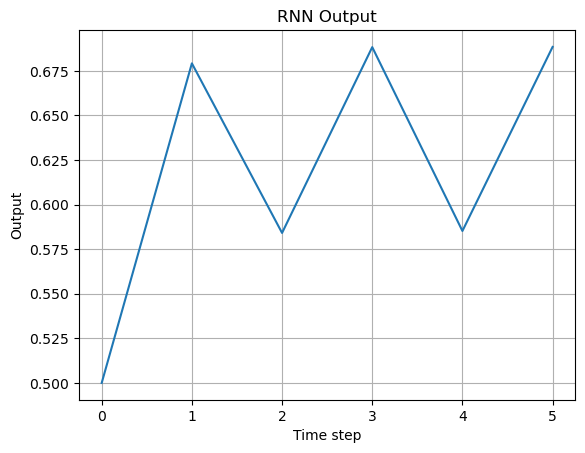

In [8]:
class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Weight for input to hidden layer
        self.w_ih = [0.5 for _ in range(input_size)]  # Simplified weight initialization
        # Weight for hidden to hidden connection
        self.w_hh = 0.5  # Single weight for recurrent connection
        # Bias
        self.b = 0.0

    def forward(self, inputs):
        # Initialize hidden state
        h = 0.0
        outputs = []
        
        for t in range(len(inputs)):
            # Update hidden state with input and previous hidden state
            h = self.sigmoid(sum(inputs[t] * self.w_ih[i] for i in range(self.input_size)) + self.w_hh * h + self.b)
            outputs.append(h)
        
        return outputs

    @staticmethod
    def sigmoid(x):
        # Sigmoid activation function
        return 1 / (1 + 2.71828 ** -x)

# Example usage
input_vector = [0, 1, 0, 1, 0, 1]  # Example square wave input
rnn = SimpleRNN(input_size=1, hidden_size=1)
output = rnn.forward(input_vector)

print("Output of the RNN:", output)

# Plotting the output
import matplotlib.pyplot as plt

plt.plot(output)
plt.title("RNN Output")
plt.xlabel("Time step")
plt.ylabel("Output")
plt.grid()
plt.show()
